# Lab: Build Neural Networks via Pytorch

The purpose of this assignment is to learn how to build neural networks using PyTorch, focusing on both the theoretical and practical aspects of the process.

One key step involves passing the output of a regression model through the Sigmoid function. This operation transforms the raw output (often called the logit) into a probability value between 0 and 1, which represents the likelihood of an observation belonging to the positive class. 

This step is particularly important in binary classification tasks, as it allows us to interpret the model's predictions in probabilistic terms and enables subsequent evaluation using metrics such as accuracy or binary cross-entropy loss.

## Imports
<hr>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torchsummary import summary
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import make_regression, make_circles, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Neural Network Classification
<hr>

### 1. Binary Classification

We will build a binary classification model using PyTorch. The output of the regression model will be passed through the Sigmoid function to convert it into a value between 0 and 1, representing the probability that an observation belongs to the positive class.

#### PyTorch Tensor

Please convert your input data, X (features) and y (labels), into PyTorch tensors so they can be used with PyTorch models.

X_t and y_t are created as tensors with the data type torch.float32, which is required for most machine learning tasks in PyTorch.

In [3]:
X, y = make_circles(n_samples=300, factor=0.5, noise=0.1, random_state=2020)

# Convert input data into tensors
X_t = torch.tensor(X, dtype = torch.float32)#your code
y_t = torch.tensor(y, dtype = torch.float32)#your code


#### TensorDataset
Use PyTorch's TensorDataset and DataLoader to prepare the dataset for training, including batching and shuffling.

Requirements:

Combine X_t and y_t into a dataset using TensorDataset.

Use DataLoader to create batches of data for training. The batch size should be specified by the variable 45.
Enable shuffle=True in the DataLoader to randomize the order of data for each epoch.

In [5]:
# Create dataloader
batchSize = 45
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)# your code

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Data points with y = 0 should be marked in blue, and those with y = 1 should be marked in red.
- Both the x-axis and y-axis labels should have a font size of 14.

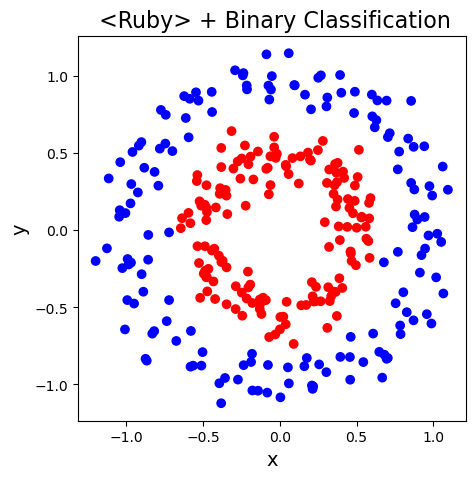

In [7]:
# Plot each class
plt.figure(figsize=(5, 5))
colors = np.where(y==0, 'blue', 'red')
plt.scatter(X[:,0], X[:,1], color=colors)
# Add Label and title
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.title(" <Ruby> + Binary Classification", fontsize=16)
plt.show()


We're going to start using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

#### Create Neural Network 

Implement a neural network class for binary classification using PyTorch's nn.Module.

- Create a fully connected layer that maps the input features to the hidden layer.
- Use Relu as activation
- Create another fully connected layer
- Use Sigmoid


In [11]:
# Function to implement a neural network for binary classification
class binaryClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = nn.Sequential(
            # Create fully connected layer
            nn.Linear(input_size, hidden_size),
            # Relu activation
            nn.ReLU(),
            # Create fully connected layer
            nn.Linear(hidden_size, output_size),
            # Use Sigmoid
            nn.Sigmoid()
        
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Build trainer

Implement a simple training wrapper for a PyTorch network that handles the forward pass, backpropagation, and parameter updates for multiple epochs.

Training Process:

Epoch Loop: 
- Iterate over the specified number of epochs.

Batch Loop:
- Iterate over batches of X and y from the dataloader.
- Clear the gradients using optimizer.zero_grad().
- Perform a forward pass:
- Use the model to compute predictions (y_hat).
- Flatten the output to match the expected shape if necessary.
- Calculate the loss using criterion(y_hat, y).
- Perform backpropagation with loss to compute gradients.
- Update model parameters using optimizer.step().
- Accumulate the loss for the batch into a running total.

Logging:
- At the end of each epoch, compute and print the average loss over all batches if verbose is True.

In [13]:
# Trainer function
def trainer(model, criterion, optimizer, dataloader, epochs=5, verbose=True):
    # Store losses
    lossesArr = []
    # Iterate over epochs
    for epoch in range(epochs):
        losses = 0
        # Iterate over batches from dataloader
        for X, y in dataloader:
            optimizer.zero_grad()        # Clear gradients w.r.t. parameters
            y_hat = model(X).flatten()       # Forward pass to get output
            loss = criterion(y_hat, y)        # Calculate loss
            loss.backward()         # Getting gradients w.r.t. parameters
            optimizer.step()            # Update parameters
            losses += loss.item()       # Add loss for this batch to running total
        if verbose: 
            lossesArr.append(losses / len(dataloader))
            print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")
    return lossesArr

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [ ]:
#LEARNING_RATE = 0.1
#criterion = torch.nn.BCELoss()#your code  # loss function - binary cross entropy loss
#optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)#your code  # optimization algorithm - Adam

Let's train the model:

In [15]:
# set your mode with 2 input layers, 6 hidden layers, and 1 output layers via binaryClassifier class
model = binaryClassifier(input_size = 2, hidden_size = 6, output_size = 1)

#### Activation functions

We're going to using `ReLU` as our activation function(s) and `Adam` as our optimizer because these are what are currently, commonly used in practice. We are doing classification now so we'll need to use log loss (binary cross entropy) as our loss function:

$$f(w) = \sum_{x,y \in D} -y log(\hat{y}) - (1-y)log(1-\hat{y})$$

In PyTorch, the binary cross entropy loss criterion is `torch.nn.BCELoss`. The formula expects a "probability" which is why we add a Sigmoid function to the end of out network.

In [17]:
LEARNING_RATE = 0.1
criterion = torch.nn.BCELoss() # loss function
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)  # optimization algorithm

In [19]:
# build your trainer funtion with model, criterion, optimizer, dataloader, epochs=30, verbose=True
losses = trainer(model, criterion, optimizer, dataloader, epochs = 30, verbose = True)
losses

epoch: 1, loss: 0.6778
epoch: 2, loss: 0.6079
epoch: 3, loss: 0.5364
epoch: 4, loss: 0.4450
epoch: 5, loss: 0.3385
epoch: 6, loss: 0.2590
epoch: 7, loss: 0.1986
epoch: 8, loss: 0.1407
epoch: 9, loss: 0.1075
epoch: 10, loss: 0.0863
epoch: 11, loss: 0.0739
epoch: 12, loss: 0.0678
epoch: 13, loss: 0.0595
epoch: 14, loss: 0.0532
epoch: 15, loss: 0.0500
epoch: 16, loss: 0.0444
epoch: 17, loss: 0.0456
epoch: 18, loss: 0.0424
epoch: 19, loss: 0.0374
epoch: 20, loss: 0.0343
epoch: 21, loss: 0.0330
epoch: 22, loss: 0.0313
epoch: 23, loss: 0.0296
epoch: 24, loss: 0.0291
epoch: 25, loss: 0.0276
epoch: 26, loss: 0.0260
epoch: 27, loss: 0.0250
epoch: 28, loss: 0.0244
epoch: 29, loss: 0.0239
epoch: 30, loss: 0.0216


[0.6777943883623395,
 0.6079227072851998,
 0.5364230360303607,
 0.44503013151032583,
 0.33848160079547335,
 0.2590192300932748,
 0.1985590330192021,
 0.14066132264477865,
 0.10753503016063146,
 0.08629925549030304,
 0.07385202922991344,
 0.06777029803821019,
 0.059481279126235416,
 0.05321418972952025,
 0.04998868757060596,
 0.044400338881782124,
 0.04555201078099864,
 0.04241673595138958,
 0.037425845595342774,
 0.03432673681527376,
 0.03299187762396676,
 0.031276971367853026,
 0.029609049670398235,
 0.02912700069802148,
 0.02757997132305588,
 0.025987845712474415,
 0.024959454579012736,
 0.024401596747338772,
 0.02392581876899515,
 0.021647647555385317]

#### Visualize your results 

#### Part 1: Loss Curve

- Please plot the loss curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

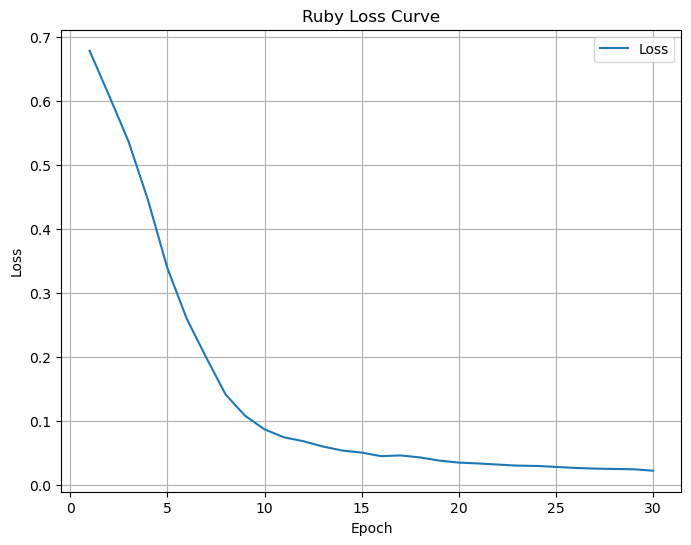

In [23]:
# Plot loss curve 
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(losses) + 1), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Ruby Loss Curve')
plt.legend()
plt.grid()
plt.show()

### Part 2: Actual and predicted data 

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

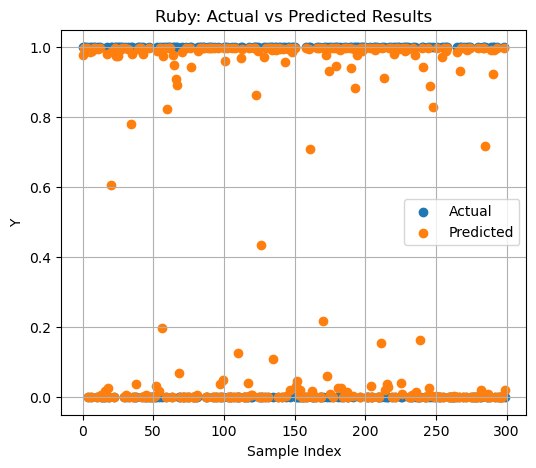

In [27]:
# Actual vs predicted data
y_p = model(X_t).detach().numpy().squeeze()
plt.figure(figsize=(6,5))
plt.scatter(range(len(y)), y, label='Actual')
plt.scatter(range(len(y)), y_p, label='Predicted')
plt.title("Ruby: Actual vs Predicted Results")
plt.xlabel("Sample Index")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

To be clear, our model is just outputting some number between -1 and +1 (we are applying Sigmoid in the model), so:
- To get the probabilities we would need to pass them through a Sigmoid;
- To get classes, we can apply some threshold (usually 0.5) to this probability.

For example, we would expect the point (0,0) to have a high probability and the point (-1,-1) to have a low probability:

In [29]:
prediction = y_p
print(prediction)

[9.78962839e-01 9.97895360e-01 9.95514691e-01 9.97895360e-01
 5.23546578e-06 9.86503839e-01 2.31383980e-04 9.88403022e-01
 9.97895360e-01 9.97895360e-01 6.65329717e-05 9.96057034e-01
 9.97895360e-01 5.00036962e-03 1.56400856e-04 2.82226130e-04
 1.73176713e-02 9.81070757e-01 2.72253584e-02 9.09262570e-04
 6.07121110e-01 9.90389526e-01 7.67990714e-05 9.97895360e-01
 9.76264477e-01 9.73955452e-01 9.89055872e-01 9.94623780e-01
 9.97895360e-01 2.47352618e-05 9.96791542e-01 7.49391131e-03
 9.94122326e-01 1.13669717e-04 7.81177282e-01 9.79792118e-01
 6.54757430e-04 9.03666951e-05 3.65801603e-02 9.94925141e-01
 9.97895360e-01 9.97895360e-01 2.04208598e-04 9.81992841e-01
 1.59431584e-04 6.23368938e-03 2.29058915e-05 9.97895360e-01
 3.50181595e-04 1.22692168e-03 2.35156011e-04 3.49963503e-03
 3.32434177e-02 9.89818871e-01 1.72857754e-02 9.97895360e-01
 1.97110698e-01 9.74995315e-01 9.97895360e-01 1.06448249e-04
 8.22217643e-01 9.97895360e-01 9.97895360e-01 3.41576408e-04
 9.78993297e-01 9.490724

In [31]:
probability = torch.sigmoid(torch.tensor(prediction))
print(probability)

tensor([0.7269, 0.7306, 0.7302, 0.7306, 0.5000, 0.7284, 0.5001, 0.7288, 0.7306,
        0.7306, 0.5000, 0.7303, 0.7306, 0.5013, 0.5000, 0.5001, 0.5043, 0.7273,
        0.5068, 0.5002, 0.6473, 0.7292, 0.5000, 0.7306, 0.7264, 0.7259, 0.7289,
        0.7300, 0.7306, 0.5000, 0.7304, 0.5019, 0.7299, 0.5000, 0.6859, 0.7271,
        0.5002, 0.5000, 0.5091, 0.7301, 0.7306, 0.7306, 0.5001, 0.7275, 0.5000,
        0.5016, 0.5000, 0.7306, 0.5001, 0.5003, 0.5001, 0.5009, 0.5083, 0.7291,
        0.5043, 0.7306, 0.5491, 0.7261, 0.7306, 0.5000, 0.6947, 0.7306, 0.7306,
        0.5001, 0.7269, 0.7209, 0.7128, 0.7094, 0.5175, 0.5000, 0.7283, 0.5004,
        0.5001, 0.7306, 0.5002, 0.5000, 0.7306, 0.7195, 0.5003, 0.5000, 0.5000,
        0.5013, 0.7291, 0.7306, 0.7306, 0.7306, 0.7306, 0.5000, 0.5000, 0.7306,
        0.7306, 0.7306, 0.5001, 0.7306, 0.5001, 0.5000, 0.7306, 0.5093, 0.5000,
        0.5121, 0.7306, 0.7233, 0.7306, 0.5000, 0.5000, 0.5001, 0.7306, 0.5000,
        0.7306, 0.5000, 0.5313, 0.5000, 

In [33]:
classes = np.where(probability > 0.5, 1, 0)
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


### 2. Multiclass Classification

For multiclass classification, we'll need the softmax function:

$$\sigma(\vec{z})_i=\frac{e^{z_i}}{\sum_{j=1}^{K}e^{z_j}}$$

It basically outputs probabilities for each class we wish to predict, and they all sum to 1. 

`torch.nn.CrossEntropyLoss` is a loss that combines a softmax with cross entropy loss. 

Let's try a 4-class classification problem using the following network:


In [35]:
X, y = make_blobs(n_samples=200, centers=4, center_box=(-1.2, 1.2), cluster_std=[0.15, 0.15, 0.15, 0.15], random_state=12345)
X_t = torch.tensor(X, dtype = torch.float32)
y_t = torch.tensor(y, dtype = torch.float32)

# Create dataloader
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset, batch_size=batchSize, shuffle=True)

In [37]:
# Function to implement neural network for multi classification
class multiClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.ReLU(),
            torch.nn.Linear(hidden_size, output_size)
        )

    def forward(self, x):
        out = self.main(x)
        return out

#### Visualize your circular dataset

Visualize your circular dataset with the following requirements:

- The figure size should be set to 5×5.
- Both the x-axis and y-axis labels should have a font size of 14.

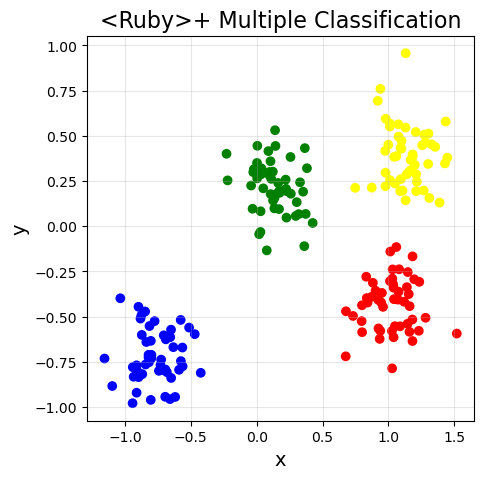

In [39]:
# Plot each class 
plt.figure(figsize = (5, 5))
plt.scatter(X[:, 0], X[:, 1], color = np.array(['red', 'blue', 'green', 'yellow'])[y])
plt.title("<Ruby>+ Multiple Classification", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.grid(alpha=0.3)
plt.show()

Let's train this model:

In [41]:
# model with 2 input layers, 6 hidden layers, and 4 output layers via multiClassifier class
model_2 = multiClassifier(input_size = 2, hidden_size = 6, output_size = 4)#your code
 
criterion = torch.nn.CrossEntropyLoss()# loss function with CrossEntropyLoss
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.2)# optimization algorithm - Adam lr=0.2
lossesArr = []
for epoch in range(10):
    losses = 0
    for X_batch, y_batch in dataloader:
        optimizer.zero_grad()       # Clear gradients w.r.t. parameters
        y_hat = model_2(X_batch)           # Forward pass to get output
        loss = criterion(y_hat, y_batch.long())  # Calculate loss
        loss.backward()             # Getting gradients w.r.t. parameters
        optimizer.step()            # Update parameters
        losses += loss.item()        # Add loss for this batch to running total
    lossesArr.append(losses / len(dataloader))
    print(f"epoch: {epoch + 1}, loss: {losses / len(dataloader):.4f}")

epoch: 1, loss: 1.1594
epoch: 2, loss: 0.4890
epoch: 3, loss: 0.1238
epoch: 4, loss: 0.0444
epoch: 5, loss: 0.0178
epoch: 6, loss: 0.0043
epoch: 7, loss: 0.0028
epoch: 8, loss: 0.0015
epoch: 9, loss: 0.0010
epoch: 10, loss: 0.0009


#### Visualize your results 

### Part 3: Accuracy Curve for 4 classes

- Please plot the Accuracy Curve during training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

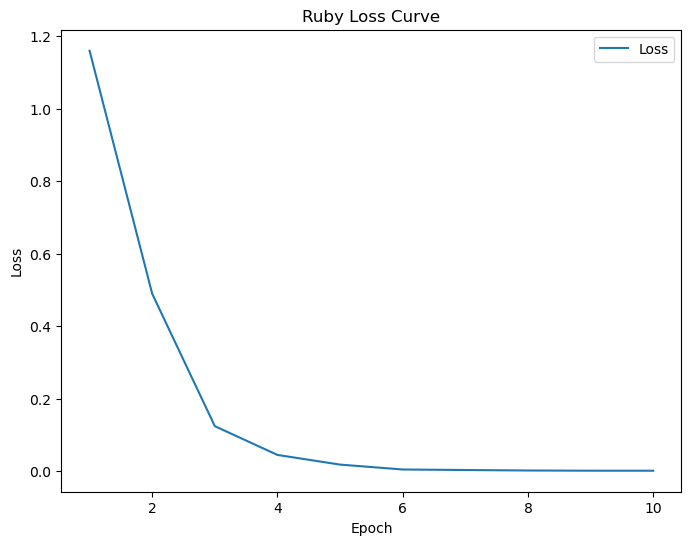

In [43]:
# Plot loss
plt.figure(figsize = (8, 6))
plt.plot(range(1, len(lossesArr) + 1), lossesArr, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Ruby Loss Curve')
plt.legend()
plt.show()

### Part 4: Actual and predicted data for classes

- Please plot the Actual and predicted data after training.
- Your graph needs to be labeled with x-axis, y-axis, and title.
- The title needs to include your first name.
- Your graph needs to have a legend and a grid.

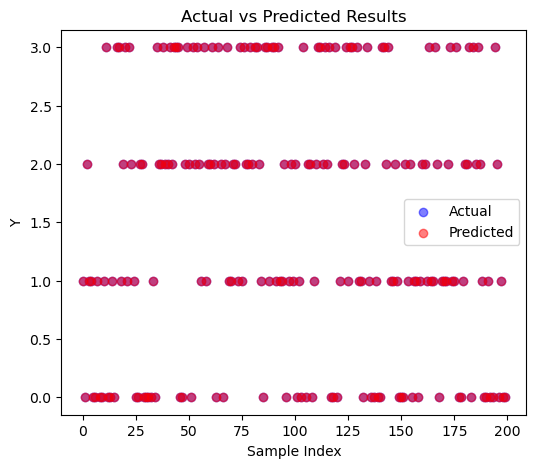

In [45]:
# Actual vs predicted data
y_p = model_2(X_t).detach().numpy().argmax(axis = 1)
plt.figure(figsize=(6,5))
plt.scatter(range(len(y)), y, label='Actual', color = 'blue', alpha = 0.5)
plt.scatter(range(len(y)), y_p, label='Predicted', color = 'red', alpha = 0.5)
plt.title("Actual vs Predicted Results")
plt.xlabel("Sample Index")
plt.ylabel("Y")
plt.legend()
plt.show()